# Aula prática: Análise de Componentes Principais (PCA) em python.

In [64]:
# Como primeiro passo, vamos importar a biblioteca pandas:
import pandas as pd

# O scikit-learn possui alguns conjuntos de dados prontos para uilitzarmos em aulas práticas. Nesse caso, 
# vamos usar o scikit-learn para importar um dataset de caracteres manuscritos, somente como exemplo:

from sklearn.datasets import load_digits



In [30]:
# Vamos carregar nosso dataset de dígitos, e explorá-lo um pouco:
dataset = load_iris()

print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [22]:
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [31]:
# Vamos agora ver o campo data (os nossos x's do dataset):
print(dataset.data.shape) # << Deveriam ser 1797 imagens de tamanho 8x8=64 pixels (veremos os valores).

(150, 4)


In [33]:
# Vejamos o primeiro vetor de x's. Repare que os pixels já foram convertidos em valores correspondentes a sua cor:
print( dataset.data[0])

[5.1 3.5 1.4 0.2]


In [38]:
# Para vermos esse array de 64 valores como uma imagem, primeiro temos que transformá-lo numa matrix 8x8:
print(dataset.data[0].reshape(4,1))


[[5.1]
 [3.5]
 [1.4]
 [0.2]]


<Figure size 432x288 with 0 Axes>

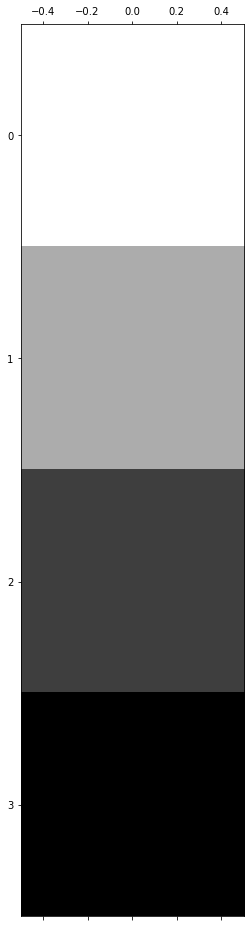

In [40]:
# Para vermos esse vetor de números como a imagem original, vamos utilizar a matplotlib:
from matplotlib import pyplot as plt

plt.gray() # << Vamos ver imagens em escala de cinza:

# Plotando nossos exemplos do dataset como imagens:
plt.matshow(dataset.data[0].reshape(4,1))


In [41]:
# Agora que vimos os valores de entrada (nossos x's) podemos ver os valores correspondentes de saída (y's):
import numpy as np

print(dataset.target[0]) # << Como podemos ver, a primeira imagem é um zero!

# Podemos ver agora todos os tipos de saídas (y's) existentes no dataset:
np.unique(dataset.target)

0


array([0, 1, 2])

# Agora que já exploramos os dados, criando nosso dataframe:

In [55]:
# Criando nosso dataframe:
df = pd.DataFrame( dataset.data, columns=dataset.feature_names)

# Imprimindo os primeiros valores, só para confirmar o resultado:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# Vamos ver uma descrição do dataset (estatísticas):
df.describe() # Vamos ver que os valores dos pixels vão de 0 a 16!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
# Criando nossos X's e nossos y's correspondentes:
X = df
y = dataset.target

In [45]:
# Para utilizarmos qualquer PCA, o primeiro passo consiste em escalonar nossos dados para média 0 e Var 1:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Escalonando nosso dataset para que os valores tenham média 0 e variância 1.0:
X_scaled = scaler.fit_transform(X)

# Podemos ver que a relação entre os valores dos pixels se manteve, mas escalonados [-1.0, 1.0]:
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [46]:
# Lembrem-se das nossas aulas anteriores. Precisamos dividir nosso dataset entre conjuntos de treino e teste:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=30)

In [48]:
# Somente como exemplo, vamos usar um algoritmo de Regressão logística (podemos usar outros depois):
from sklearn.linear_model import LogisticRegression

# Criando o modelo:
model = LogisticRegression()
# Passando o conjunto de treino:
model.fit( X_train, y_train)
# E o conjutno de testes:
model.score(X_test, y_test)

0.9333333333333333

In [61]:
# Agora podemos usar PCA nas amostras e ver como ele vai funcionar:
from sklearn.decomposition import PCA

# Podemos "forçar" o número de variáveis, ou estabelecer a porcentagem de variância que queremos capturar:

# Forçando o número de componentes seria:
# pca = PCA(n_components=3)

# Fixando somente a variância:
pca = PCA(0.7) # << Capturando 95% da variância.
# Calculando o PCA:
X_pca = pca.fit_transform(X)

# Imprimindo o novo shape, ou seja, o número de novos x's (o original é 64):
print(X_pca.shape)

(150, 1)


In [62]:
# Vamos imprimir a captura de variância de cada dimensão do PCA. Claro, as primeiras dimensões deveriam ser 
# as mais importantes, portanto capturando mais variância:
print(pca.explained_variance_ratio_)

[0.92461872]


In [63]:
# Agora podemos treinar nosso algoritmo novamente, utilizando os mesmos y's como saída, mas substituindo as 
# entradas originais pelas entradas fornecidas pelo PCA:

# Dividindo o dataset novamente em treino e teste:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=30)

# Treinando novamente os dados:

# Criando o modelo:
model_pca = LogisticRegression()
# Passando o conjunto de treino:
model_pca.fit( X_train_pca, y_train)
# E o conjutno de testes:
model_pca.score(X_test_pca, y_test)


0.9333333333333333

# Exercícios:
 1. Modifique a quantidade de variância e gere vários treinamentos com PCAs diferentes;
 2. Utilize algum outro algoritmo de treinamento a sua escolha, e verifique o resultado que você consegue.

In [83]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [85]:
clf_pca = tree.DecisionTreeClassifier()
clf_pca.fit(X_train_pca, y_train)
clf_pca.score(X_test_pca, y_test)

0.9333333333333333